<a href="https://colab.research.google.com/github/marwanmohamed21346/AiTP_project_SIGN_LANGUAGE_DETECTOR_1/blob/main/training_google_colab_scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install torch torchvision torchaudio


In [44]:
!pip install mediapipe

In [45]:
!pip install opencv-python

In [46]:
!pip install scikit-learn


In [47]:
!pip install tensorflow


In [48]:
!pip install matplotlib


In [49]:
!pip install pandas


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import zipfile

# الملف المضغوط
zip_file_path = '/content/drive/MyDrive/archive.zip'

# المجلد الذي سيتم فك ضغط الملف فيه
extracted_folder_path = '/content/drive/MyDrive/zip test'

# فك الضغط على الملف
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [52]:
import os

# تحديد المجلد المستخرج
extracted_folder_path = '/content/drive/MyDrive/zip test'

# تحديد المسارات المباشرة للملفات
test_csv_path = os.path.join(extracted_folder_path, 'sign_mnist_test', 'sign_mnist_test.csv')
train_csv_path = os.path.join(extracted_folder_path, 'sign_mnist_train', 'sign_mnist_train.csv')

# يمكنك القيام بما تشاء باستخدام هذه المسارات، على سبيل المثال:
print(f"/content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv: {test_csv_path}")
print(f"/content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv: {train_csv_path}")


/content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv: /content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv
/content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv: /content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv


In [53]:
!pip install numpy pandas seaborn opencv-python matplotlib torch


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import os
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.autograd import Variable
from torch import optim

In [55]:
import pandas as pd

# قراءة ملف sign_mnist_test.csv
test_data_raw = pd.read_csv(test_csv_path)

# قراءة ملف sign_mnist_train.csv
train_data_raw = pd.read_csv(train_csv_path)

# قد تقوم بطباعة بعض المعلومات الأولية عن البيانات
print("/content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv")
print(test_data_raw.info())

print("/content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv")
print(train_data_raw.info())

/content/drive/MyDrive/zip test/sign_mnist_test/sign_mnist_test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
None
/content/drive/MyDrive/zip test/sign_mnist_train/sign_mnist_train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
None


In [56]:
train_labels = train_data_raw['label']
train_data_raw.drop('label', axis=1, inplace=True)

test_labels = test_data_raw['label']
test_data_raw.drop('label', axis=1, inplace=True)

In [57]:
train_data = train_data_raw.values
train_labels = train_labels.values

test_data = test_data_raw.values
test_labels = test_labels.values

In [58]:
set(train_labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [59]:
dim=28

<Axes: >

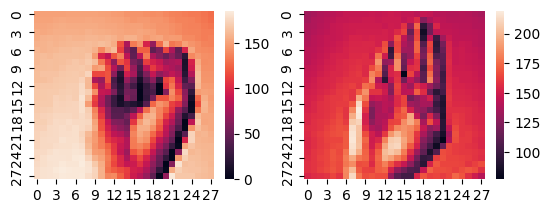

In [60]:
pixels = train_data[20].reshape(dim, dim)
plt.subplot(221)
sns.heatmap(data=pixels)

pixels = train_data[30].reshape(dim, dim)
plt.subplot(222)
sns.heatmap(data=pixels)

In [61]:
reshaped_train = []
for i in train_data:
    reshaped_train.append(i.reshape(1, dim, dim))
train_data = np.array(reshaped_train)

reshaped_test = []
for i in test_data:
    reshaped_test.append(i.reshape(1, dim, dim))
test_data = np.array(reshaped_train)

In [62]:
train_x = torch.FloatTensor(train_data)
train_y = torch.LongTensor(train_labels.tolist())

test_x = torch.FloatTensor(train_data)
test_y = torch.LongTensor(train_labels.tolist())

In [63]:
alph = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R',
        18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y' }

In [64]:
class Network(nn.Module):
    def _init_(self):
        super(Network, self)._init_()
        self.conv1 = nn.Conv2d(1,10,3)
        self.conv2 = nn.Conv2d(10,20,3)
        self.conv3 = nn.Conv2d(20,30,3)

        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout2d(0.2)

        self.fc1 = nn.Linear(30*3*3, 270)
        self.fc2 = nn.Linear(270,26)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = x.view(-1, 30 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.softmax(F.relu(self.fc2(x)))

        return(x)

    def test(self, predictions,labels):
        self.eval()
        correct = 0
        for p,l in zip(predictions,labels):
            if p==l:
                correct+=1
        acc = correct/len(predictions)
        return(acc, correct, len(predictions))

    def evaluate(self, predictions,labels):
        correct = 0
        for p,l in zip(predictions,labels):
            if p==l:
                correct+=1
        acc = correct/len(predictions)
        return(acc)

In [65]:
use_cuda = torch.cuda.is_available()

if use_cuda:
    model = Network().cuda()

In [70]:
summary(model, (1,dim,dim))


AttributeError: 'Network' object has no attribute 'conv1'

In [67]:
epochs = 80
batch_size = 100
learning_rate = 0.001

In [68]:
optimizer = optim.SGD(model.parameters(), learning_rate, momentum=0.007)
criterion = nn.CrossEntropyLoss()

ValueError: optimizer got an empty parameter list

In [69]:
loss_log = []
acc_log = []

for e in range(epochs):
    for i in range(0, train_x.shape[0], 100):
        x_mini = train_x[i:i + 100]
        y_mini = train_y[i:i + 100]

        if use_cuda:
            x_mini = x_mini.cuda()
            y_mini = y_mini.cuda()
            test_x = test_x.cuda()
            test_y = test_y.cuda()

        optimizer.zero_grad()
        net_out = model(Variable(x_mini))

        loss = criterion(net_out, Variable(y_mini))
        loss.backward()
        optimizer.step()

        if i % 1000 == 0:
            #pred = net(Variable(test_data_formated))
            loss_log.append(loss.item())
            acc_log.append(model.evaluate(torch.max(model(Variable(test_x[:500])).data, 1)[1], test_y[:500]))

    print('Epoch: {} - Loss: {:.6f}'.format(e + 1, loss.item()))

NameError: name 'optimizer' is not defined

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(loss_log[2:])
plt.plot(acc_log)
plt.plot(np.ones(len(acc_log)), linestyle='dashed')
plt.show()

In [ ]:
predictions = model(Variable(test_x))
accuracy, correct, total = model.test(torch.max(predictions.data, 1)[1], test_y)

In [ ]:
print("Accuracy = " + str(accuracy) + " ("+str(correct)+"/"+str(total)+")")

In [ ]:
torch.save(model, 'Jo_elMofaker.pt')